In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 10.3MB/s]


In [ ]:
!mkdir heart-disease-dataset
!unzip heart-disease-dataset.zip -d heart-disease-dataset
!ls heart-disease-dataset

Archive:  heart-disease-dataset.zip
  inflating: heart-disease-dataset/heart.csv  
heart.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df['oldpeak'] = df['oldpeak'].astype('int64')
print("\nTipe data setelah perubahan:")
print(df.dtypes)


Tipe data setelah perubahan:
age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,0.796098,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.085408,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


<Axes: >

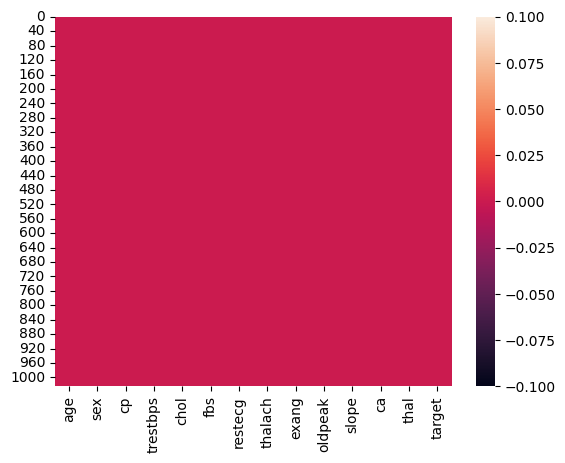

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

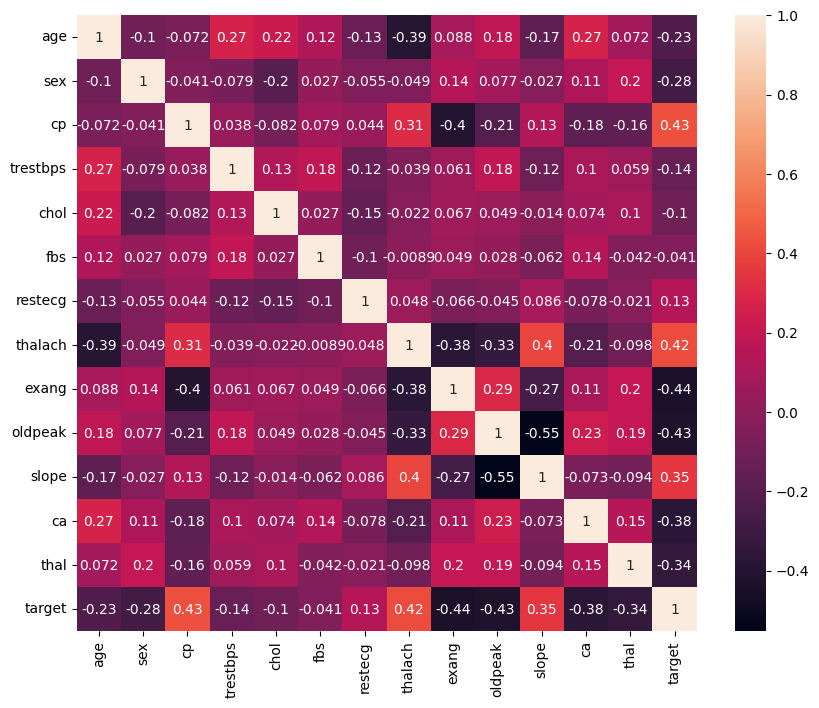

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

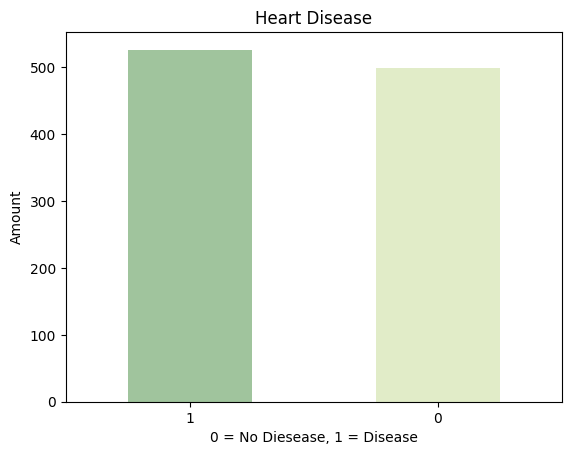

In [ ]:
df.target.value_counts().plot(kind='bar', color=['#A0C49D', '#E1ECC8']);
plt.title("Heart Disease")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [ ]:
#perbandingan kolom target dengan kolom sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


<Axes: xlabel='target'>

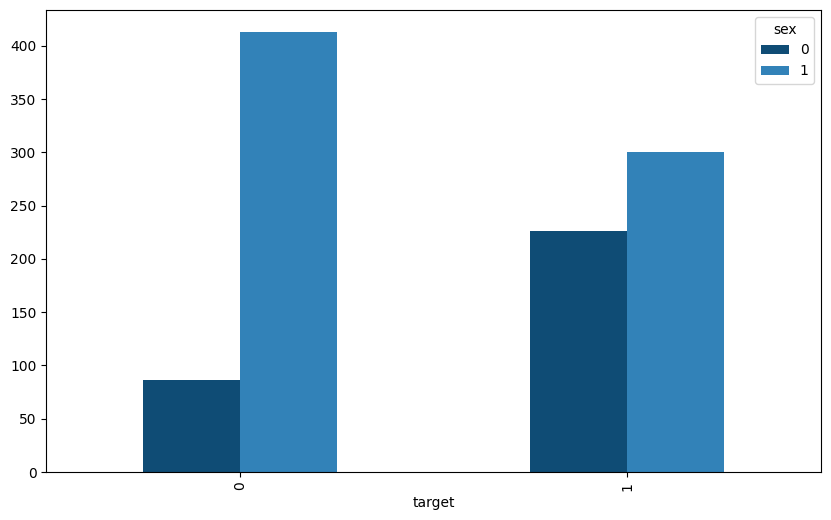

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['#0F4C75','#3282B8'])

In [ ]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
x = df[features]
y = df['target']
x.shape, y.shape

((1025, 13), (1025,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(257,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=7)
model1.fit(x_train,y_train)
y_pred1=model1.predict(X_test)

In [ ]:
score = model1.score(X_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  0.7276264591439688


In [ ]:
#Outlook=2, Temperature=77, Humidity=75, Wind=0
input_data = np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

prediction = model1.predict(input_data)
print('Estimasi terkena penyakit jantung :', prediction)

Estimasi terkena penyakit jantung : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       135
           1       0.70      0.75      0.72       122

    accuracy                           0.73       257
   macro avg       0.73      0.73      0.73       257
weighted avg       0.73      0.73      0.73       257



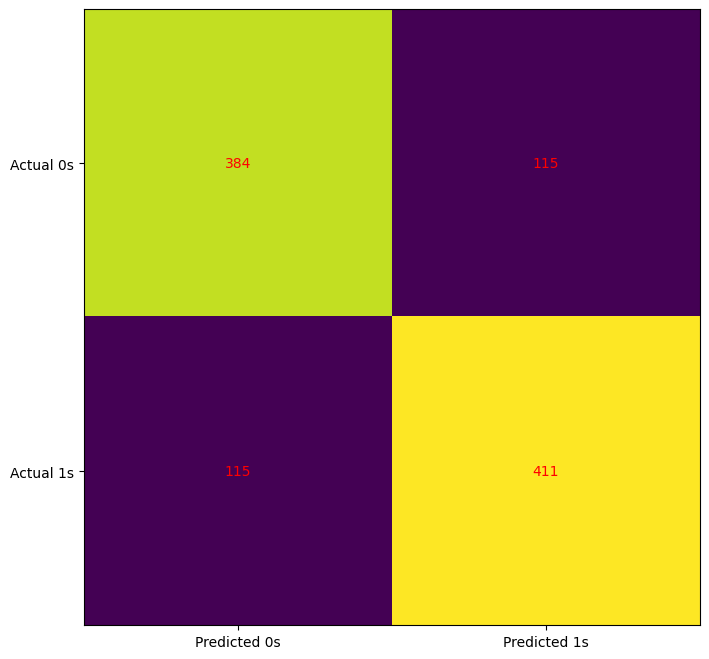

In [ ]:
cm = confusion_matrix(y, model1.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic_Regression = LogisticRegression()
logistic_Regression.fit(x_train, y_train)
logistic_Regression_value = logistic_Regression.score(X_test, y_test)
#
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
KNN_value = KNN.score(X_test, y_test)
#
fci = RandomForestClassifier()
fci.fit(x_train, y_train)
fci_value = fci.score(X_test, y_test)

model_result = {
    'logistic_Regression': logistic_Regression_value,
    'KNN': KNN_value,
    'Random Forest': fci_value
}

model_result

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_Regression': 0.8287937743190662,
 'KNN': 0.7354085603112841,
 'Random Forest': 0.9844357976653697}

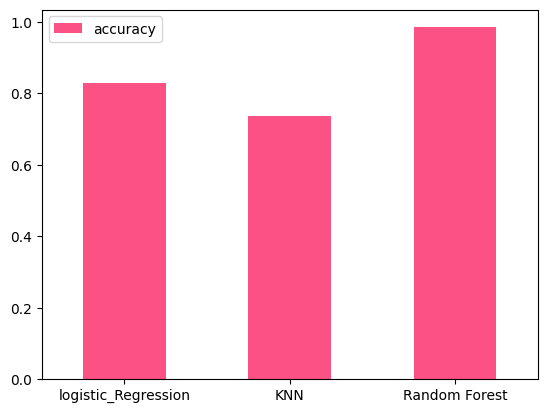

In [ ]:
model_compare = pd.DataFrame(model_result, index=['accuracy'])

model_compare.T.plot(kind='bar',color='#FC5185')
plt.xticks(rotation=0);

In [48]:
import pickle

filename = 'heart_disease.sav'
pickle.dump(model1,open(filename,'wb'))
